In [14]:
import pandas as pd
from ivpy import attach,show,montage,histogram,scatter,compose

In [2]:
DIR = "/Users/damoncrockett/ivpy-datasets/vangogh/"
df = pd.read_csv(DIR+"images.csv")

In [3]:
df.Filename = [DIR+item for item in df.Filename]

In [4]:
attach(df,'Filename')

# histogram( )

With the histogram, we introduce, at last, a proper data _axis_ and thus a _coordinate system_. Everything about the histogram that distinguishes it from a simple montage arises from this difference. Indeed, an image histogram is just a sequence of columnar montages plotted along a binned axis.

### xcol and bins

Although we've used 'xcol' before, it functions slightly differently in a histogram. Here, it specifies the histogram axis: the one whose values are binned to produce columns of datapoints. Without this axis, we'd have no rule to size and order the columns, and we'd have made no advancement on our simple montage. Accordingly, we _must_ specify 'xcol'.

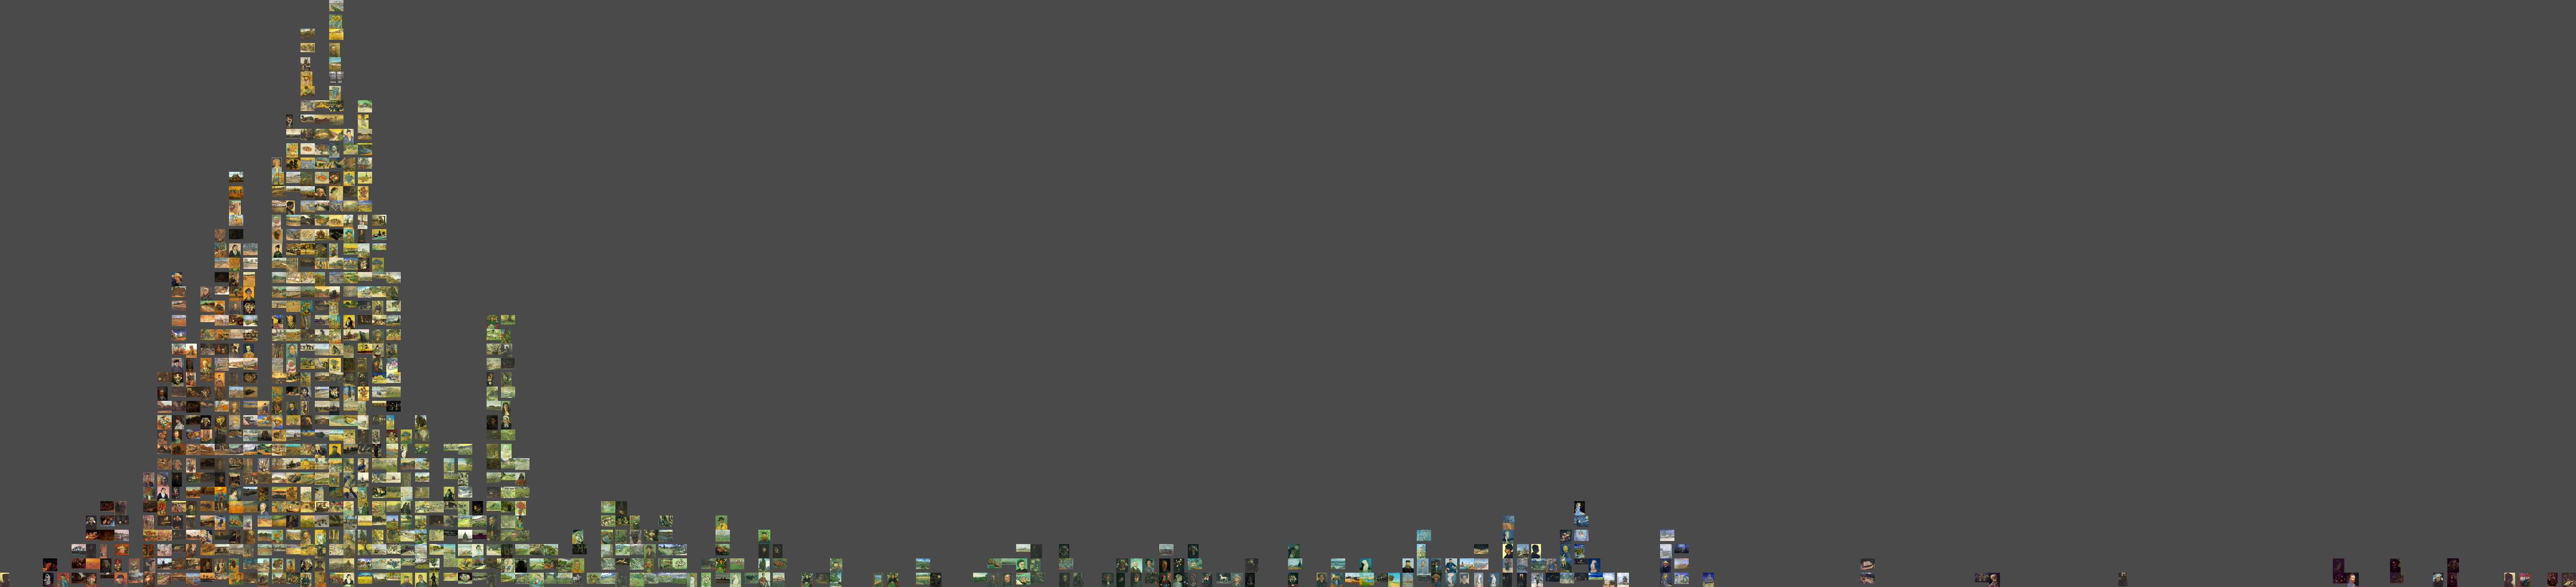

In [5]:
histogram(xcol='hue_peak',bins=180)

If we assign an integer _n_ to 'bins', the code will produce _n_ equal-width bins. We can, alternatively, assign to 'bins' a sequence of bin edges, and they can be spaced however we like. Let's try to gather up that long tail on the right: 

In [6]:
from numpy import arange

In [7]:
pretail = list(arange(0,92,2))
tail = list(arange(92,380,20))
binedges = pretail + tail

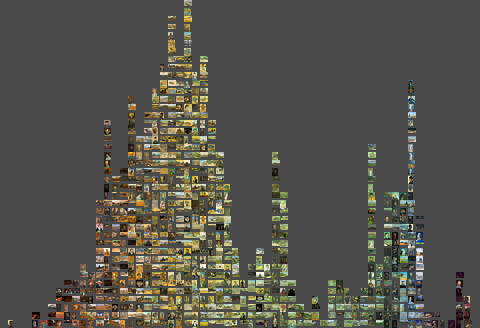

In [8]:
histogram(xcol='hue_peak',bins=binedges,thumb=8)

Be careful here, however, because viewers will assume the bins are evenly-spaced.

### ycol and ascending

We said above that 'xcol', in effect, sorts columnar montages along an axis. But we know montages can themselves be sorted. So, how do we do that in a histogram? Why, with 'ycol'! Histogram columns are sorted vertically by whatever we assign to 'ycol', and the 'ascending' argument now controls _this_ sorting.

In [28]:
brightbottom = histogram(xcol='Saturation_Median',bins=52,thumb=8,ycol='Brightness_Median',ascending=False)
brighttop = histogram(xcol='Saturation_Median',bins=52,thumb=8,ycol='Brightness_Median',ascending=True)

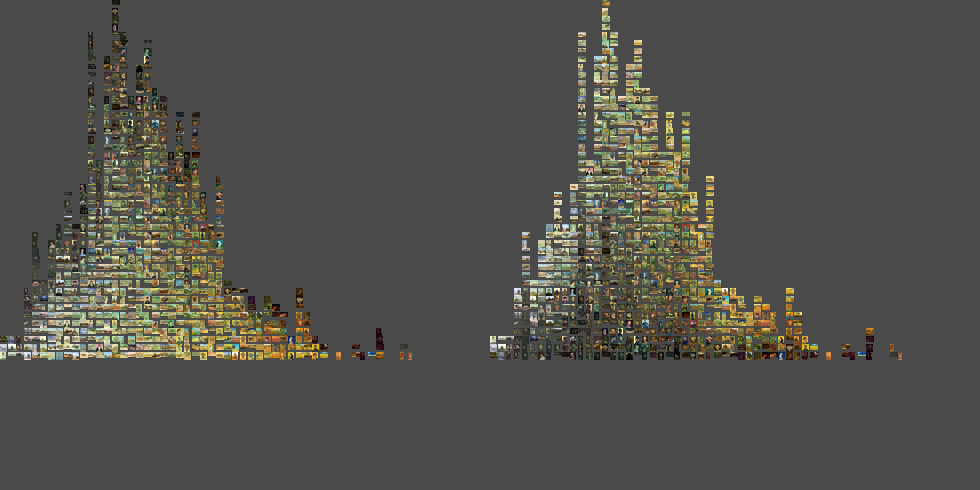

In [29]:
compose(brightbottom,brighttop,thumb=490)

On the left, the brightest images are at the bottoms of histogram columns; on the right, they are at the tops.

### xdomain

In tutorial 1, we introduced 'xdomain' as a way of subsetting our data within ivpy function calls, rather than doing it in pandas. When used with show( ) or montage( ), 'xdomain' can _only_ produce subsets of the data to be plotted. But when used with histogram( ) or scatter( ), we can also use it to expand axis ranges beyond the limits of our data. This is particularly useful if we are comparing two plots that have different data ranges. Consider the following two plots, one with paintings from 1885 and one with paintings from 1886.

In [57]:
df85 = df[df.Year==1885]
df86 = df[df.Year==1886]

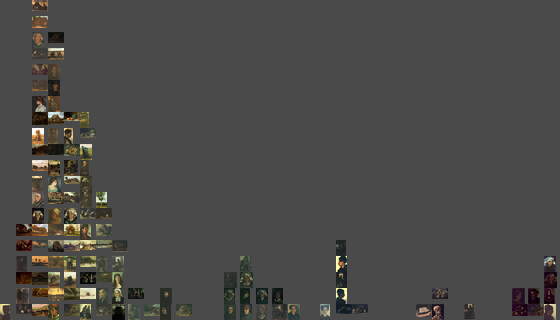

In [65]:
histogram(pathcol=df85.Filename,xcol=df85.hue_peak,thumb=16)

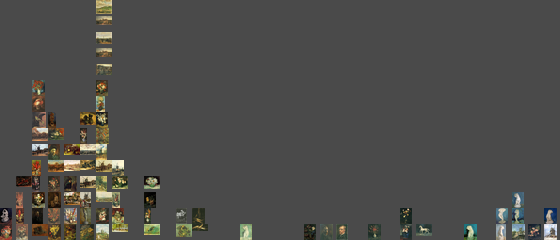

In [66]:
histogram(pathcol=df86.Filename,xcol=df86.hue_peak,thumb=16)

Though they are the same width in pixels, these two histograms don't have the same bins, and so it's very difficult to compare them directly. We could use the 'bins' argument to assign the same bin edges to both, but it's far easier simply to fix 'xdomain': 

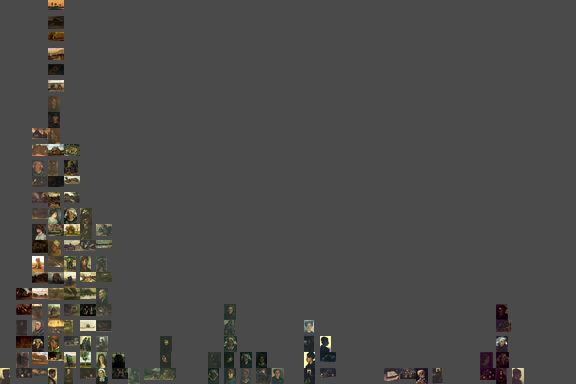

In [67]:
histogram(pathcol=df85.Filename,xcol=df85.hue_peak,xdomain=(0,360),thumb=16)

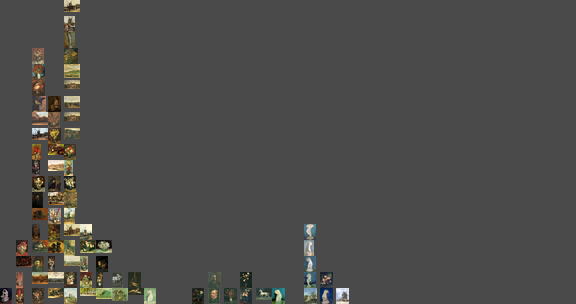

In [68]:
histogram(pathcol=df86.Filename,xcol=df86.hue_peak,xdomain=(0,360),thumb=16)

Now that we know both sets of histogram bins span the entire hue spectrum from 0 to 360, we can be confident in observing that van Gogh's 1885 paintings span a larger hue range than his 1886 paintings.

### facetcol

The domain-fixing made possible by 'xdomain' is used automatically by facetcol. Indeed, the user doesn't even have the option to look at facets with different domains. This restriction ensures that small multiples plots are always domain-consistent.

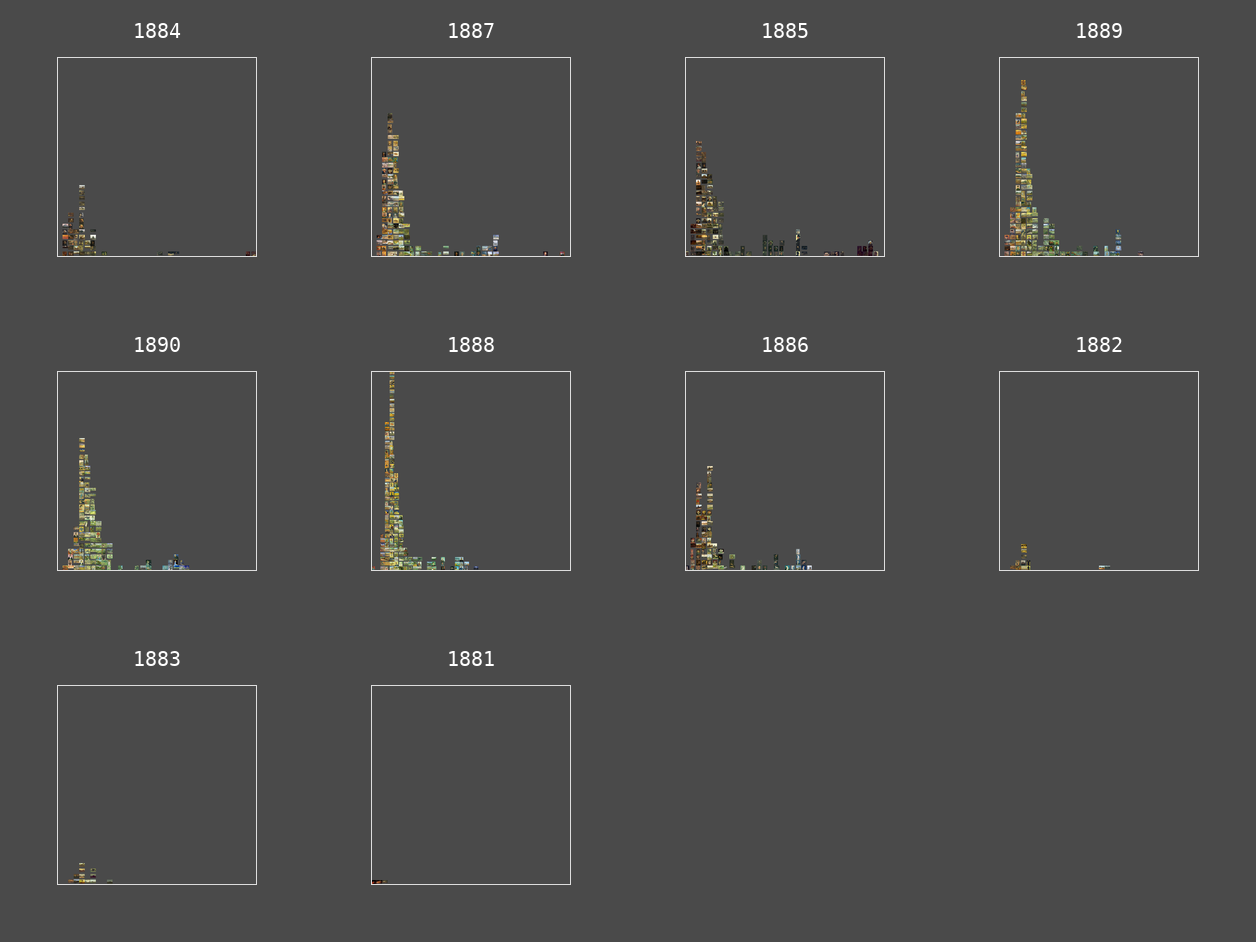

In [76]:
histogram('hue_peak',thumb=200,facetcol='Year')

### coordinates

Just as montage( ) has rectilinear and circular forms, histogram( ) has Cartesian and polar coordinate systems. The default is Cartesian, as it should be, since most variables are linear in nature. But hue, which we used above, is a circular property. Hues are ordered, but no hue is any "higher" or "lower" than any other. Hue is thus better represented in polar coordinates:

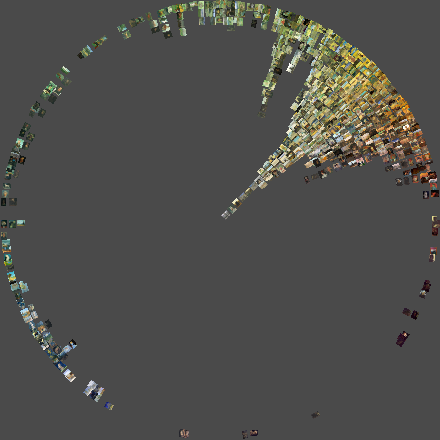

In [11]:
histogram(xcol='hue_peak',thumb=8,ycol='Saturation_Median',coordinates='polar',bins=360)

It is much easier to tell, from the polar plot, how little of the hue spectrum the master actually used. We can also split this out by genre or year:

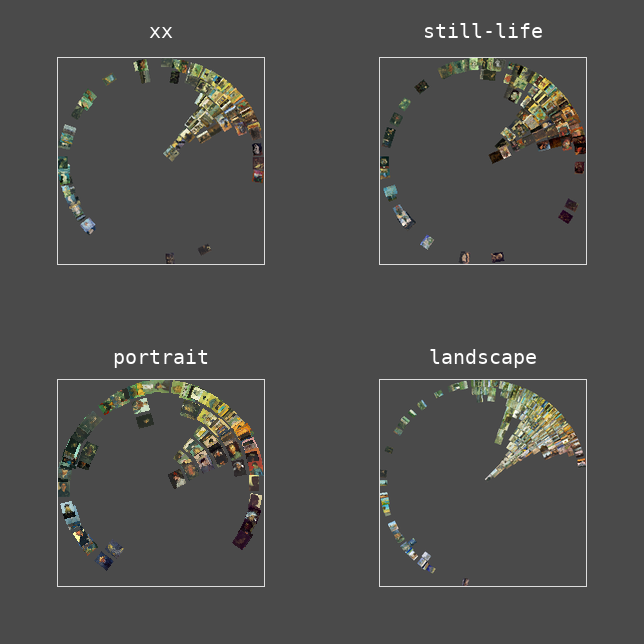

In [12]:
histogram(xcol='hue_peak',thumb=16,ycol='Saturation_Median',coordinates='polar',bins=360,facetcol='Genre_LM')

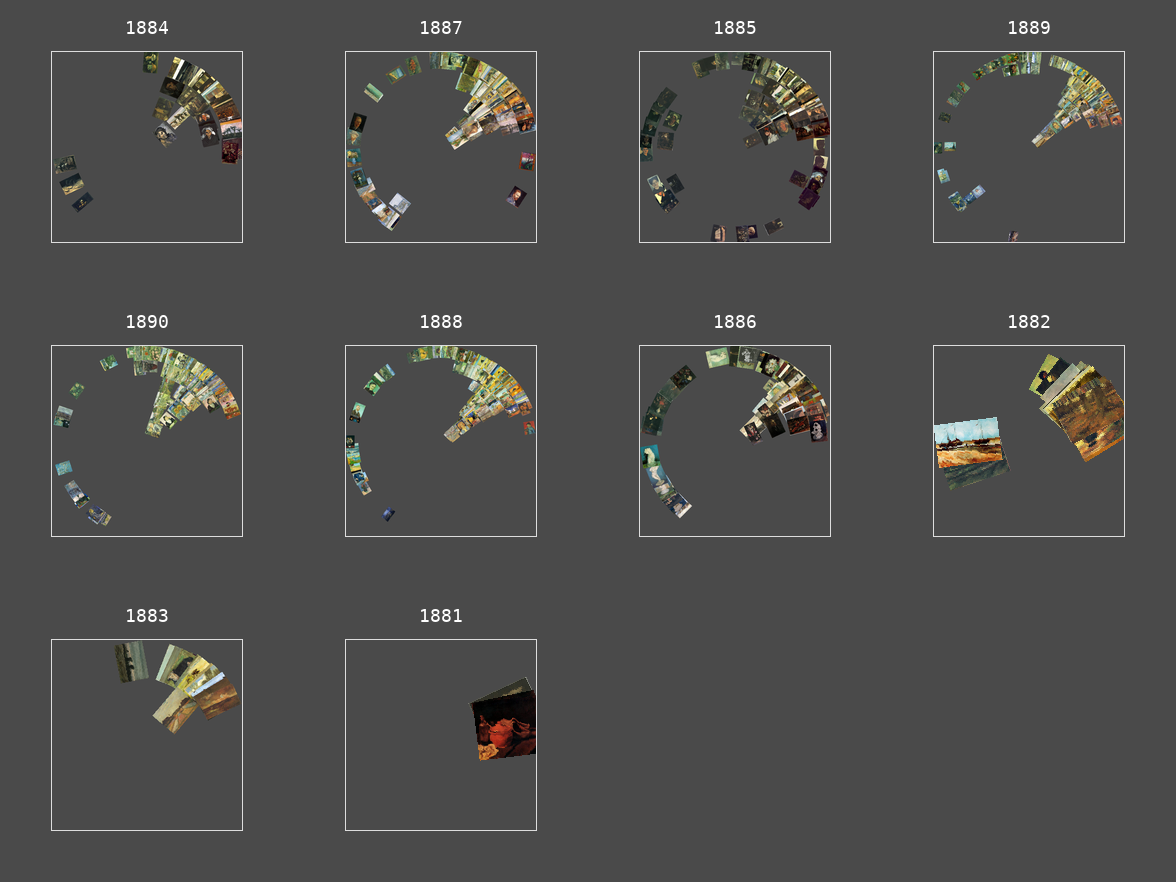

In [13]:
histogram(xcol='hue_peak',thumb=64,ycol='Saturation_Median',coordinates='polar',bins=360,facetcol='Year')

The keen viewer may have noticed that the facets with fewer images look to have larger images. In fact, all images begin the same size. But facets with fewer images are smaller, because the radius of the circle is determined by the tallest bin in the plot. When the facets are all thumbnailed to the same size, as above, the largest facets "have the furthest to go", as it were, and accordingly their images will now look smaller. In future updates, the user will have the option of fixing every facet to the same initial size, as if all the data were plotted together and then selectively removed, leaving behind only the data.